<a href="https://colab.research.google.com/github/laylamoguibmm/Tasks/blob/main/task3_elevvopaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

columns = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area{i}' for i in range(1, 5)] + [f'Soil_Type{i}' for i in range(1, 41)] + ['Cover_Type']

df = pd.read_csv('/content/covtype.csv')
print(df.columns)
print("✅ Data loaded from /content/covtype.csv")
df.head()


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [56]:
print(df['Cover_Type'].unique())
print(df['Cover_Type'].dtype)


[5 2 1 7 3 6 4]
int64


In [57]:
if df['Cover_Type'].min() == 1:
    df['Cover_Type'] = df['Cover_Type'].astype(int) - 1

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [58]:
print("Unique labels:", sorted(df['Cover_Type'].unique()))


Unique labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


In [59]:
X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
rf.fit(X_train_sample, y_train_sample)

y_pred_rf = rf.predict(X_test)
print("📊 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


📊 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90     63552
           1       0.90      0.94      0.92     84991
           2       0.87      0.91      0.89     10726
           3       0.86      0.72      0.79       824
           4       0.92      0.51      0.66      2848
           5       0.87      0.74      0.80      5210
           6       0.95      0.87      0.91      6153

    accuracy                           0.90    174304
   macro avg       0.90      0.80      0.84    174304
weighted avg       0.90      0.90      0.90    174304



In [60]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_sample, y_train_sample)

y_pred_xgb = xgb.predict(X_test)
print("📊 XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:06:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     63552
           1       0.86      0.89      0.88     84991
           2       0.87      0.89      0.88     10726
           3       0.86      0.75      0.81       824
           4       0.85      0.51      0.64      2848
           5       0.83      0.75      0.79      5210
           6       0.94      0.87      0.90      6153

    accuracy                           0.86    174304
   macro avg       0.87      0.79      0.82    174304
weighted avg       0.86      0.86      0.86    174304



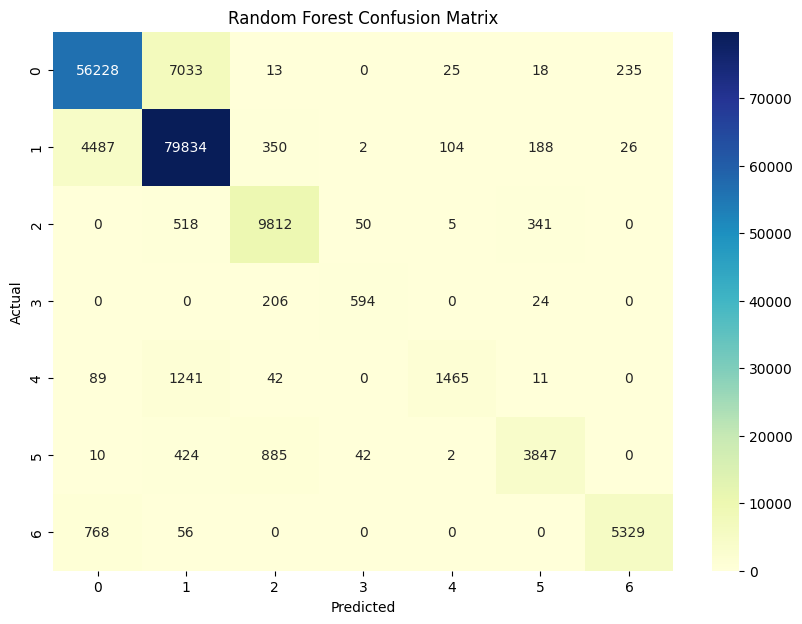

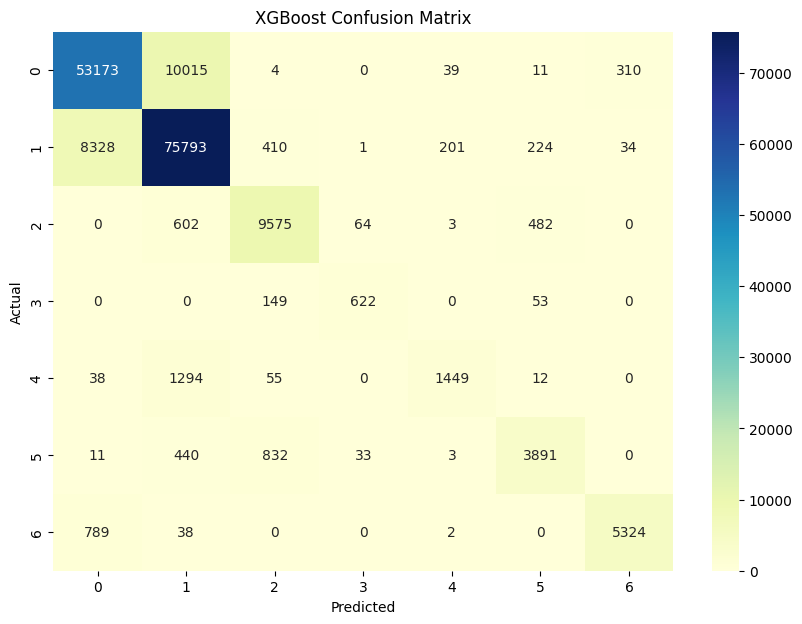

In [61]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


<Figure size 1000x700 with 0 Axes>

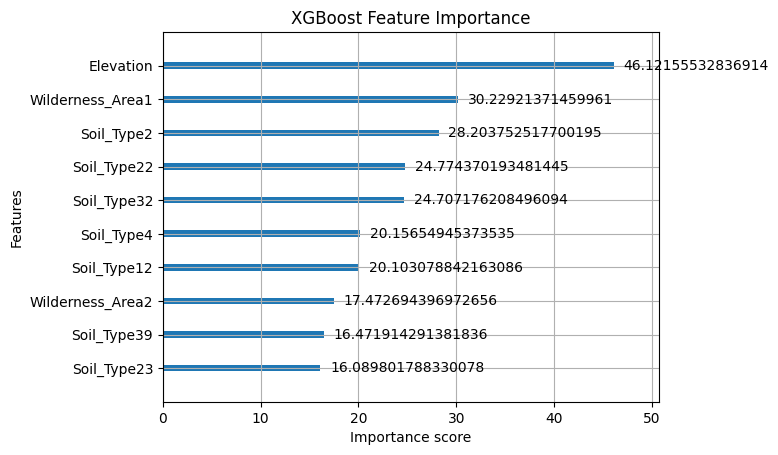

In [62]:
plt.figure(figsize=(10, 7))
plot_importance(xgb, max_num_features=10, importance_type='gain', title='XGBoost Feature Importance')
plt.show()


In [64]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 75, 100],
    'max_depth': [4, 6, 10],
    'learning_rate': [0.1, 0.01]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_sample, y_train_sample)

print("🔍 Best Parameters:", random_search.best_params_)

y_pred_tuned = random_search.predict(X_test)
print("📊 Tuned XGBoost Report:\n", classification_report(y_test, y_pred_tuned))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:12:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
📊 Tuned XGBoost Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     63552
           1       0.87      0.92      0.89     84991
           2       0.88      0.89      0.88     10726
           3       0.85      0.73      0.79       824
           4       0.89      0.47      0.61      2848
           5       0.84      0.75      0.79      5210
           6       0.95      0.89      0.92      6153

    accuracy                           0.88    174304
   macro avg       0.88      0.79      0.82    174304
weighted avg       0.88      0.88      0.88    174304



In [65]:


acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"📈 Random Forest Accuracy: {acc_rf:.4f}")
print(f"📈 XGBoost Accuracy: {acc_xgb:.4f}")
print(f"📈 Tuned XGBoost Accuracy: {acc_tuned:.4f}")


📈 Random Forest Accuracy: 0.9014
📈 XGBoost Accuracy: 0.8596
📈 Tuned XGBoost Accuracy: 0.8789
